[[578. 473.]
 [604. 458.]
 [621. 446.]
 [643. 437.]
 [670. 424.]
 [682. 414.]
 [693. 406.]]
lArrayNeg:  [1.01612398        nan        nan        nan 1.01544319 1.02767902
 1.03266302 1.03766344 1.04167866 1.0445174  1.04661542 1.04755183
 1.04875232 1.04515223 1.05146716 1.05485318 1.05278779 1.05503798
 1.05646324 1.07052034 1.09047466 1.12331539 1.14551729 1.17443959
 1.18711615 1.20519802 1.23828959 1.28088893 1.33233132 1.42803717
 1.60099123 2.01247619        nan        nan        nan]
rArrayNeg:  [0.04710419        nan        nan        nan 0.06343378 0.06758583
 0.07217675 0.07728863 0.08188386 0.08555845 0.08919176 0.09494314
 0.09852296 0.10248439 0.10658293 0.11179115 0.11589507 0.11963553
 0.12413086 0.13071897 0.13676531 0.14548245 0.15214686 0.16232059
 0.16799683 0.1745394  0.18599796 0.19662694 0.20995063 0.22974317
 0.26493641 0.34120711        nan        nan        nan]
xiPrimeNegarray [  0.                  nan          nan          nan   2.66598173
   0.17587675  -0.

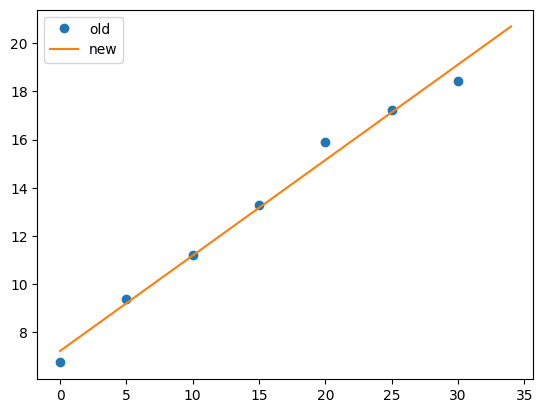

<Figure size 640x480 with 0 Axes>

In [10]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit
from scipy.optimize import fsolve


epsilonArray = np.load('output/outputEpsilon.npy')
xiPrimeNegArray = np.load('output/outputXiNeg.npy')
xiPrimePosArray = np.load('output/outputXiPos.npy')
centerArray = np.load('output/outputCenter.npy',allow_pickle=True)
print(centerArray)
radiusArray = np.load('output/outputRadius.npy')

rArrayPos = np.zeros(len(centerArray))
rArrayNeg = np.zeros(len(centerArray))

lArrayPos = np.zeros(len(centerArray))
lArrayNeg = np.zeros(len(centerArray))

epsilonPrimeArray = np.zeros(len(centerArray))

for i in range(len(centerArray)):

    xValue, yValue = centerArray[i][0], centerArray[i][1]
    xValue = xValue - 512
    yValue = yValue - 512

    xValue = xValue*45/512
    yValue = yValue*45/512

    epsilonPrimeArray[i] = np.sqrt(xValue**2 + yValue**2)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,50,5), epsilonPrimeArray)
epsilonPrimeArrayNew = linearFunc(np.arange(15,50), *parameters)

plt.figure()
plt.plot(np.arange(0,35,5),epsilonPrimeArray, 'o', label='old')
plt.plot(np.arange(0,35),epsilonPrimeArrayNew, '-', label='new')
plt.legend()
plt.figure()

    
rArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
rArrayPos = np.zeros(len(epsilonPrimeArrayNew))
lArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
lArrayPos = np.zeros(len(epsilonPrimeArrayNew))

for i in range(len(epsilonPrimeArrayNew)):
    theta = 90 - xiPrimePosArray[i]
    epsilon = epsilonArray[i]
    chi = 180 - epsilon - theta
    s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    epsilonPrime = epsilonPrimeArrayNew[i]

    r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    rArrayPos[i] = r

    l = np.sqrt(r**2 + s**2)
    lArrayPos[i] = l

for i in range(len(epsilonPrimeArrayNew)):
    theta = 90 - xiPrimeNegArray[i]
    epsilon = epsilonArray[i]
    chi = 180 - epsilon - theta
    s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    epsilonPrime = epsilonPrimeArrayNew[i]
    
    r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    rArrayNeg[i] = r

    l = np.sqrt(r**2 + s**2)
    lArrayNeg[i] = l









# for i in range(35):
#     surplus = (i - 5*(i // 5))/5

#     lArrayNegNew[i] = lArrayNeg[i//5]*(1 - surplus) + lArrayNeg[i//5 + 1]*(surplus)
#     lArrayPosNew[i] = lArrayPos[i//5]*(1 - surplus) + lArrayPos[i//5 + 1]*(surplus)
print("lArrayNeg: ",lArrayNeg)
print("rArrayNeg: ",rArrayNeg)
print("xiPrimeNegarray", xiPrimeNegArray)

print("lArrayPos: ",lArrayPos)
print("rArrayPos: ",rArrayPos)
print("xiPrimePosarray", xiPrimePosArray)

print("epsilonArray: ", epsilonArray)






xiPrimeNegArray:  [  0.                  nan          nan          nan   2.66598173
   0.17587675  -0.29296295  -0.64732909  -0.76193507  -0.66467361
  -0.40799562   0.22339136   0.63949049   1.9223958    1.46161241
   1.61110299   2.57139426   2.80409514   3.21456848   1.92451075
  -0.07909414  -3.3433479   -5.11091173  -7.1799982   -7.62693066
  -8.5094437  -10.36744049 -12.87095691 -15.53191829 -20.3118384
 -27.00778949 -36.97261113          nan          nan          nan]
xiPrimePosArray:  [ 0.                 nan         nan         nan 22.10171491 25.76362336
 27.49990306 29.17484427 30.55672731 31.63262071 32.5495383  33.33425753
 34.09232243 34.07629955 35.71144663 36.88659604 37.19287331 38.13520326
 38.99123809 41.60682057 44.7859718  49.31644625 52.25962432 55.74559322
 57.36836568 59.42687303 62.7018613  66.38155273 70.30830044 76.26442126
 84.28820756 95.51858775         nan         nan         nan]
d:  0.17422838221584616
l:  1.0161239816746825
r:  0.04710419442186275
epsi

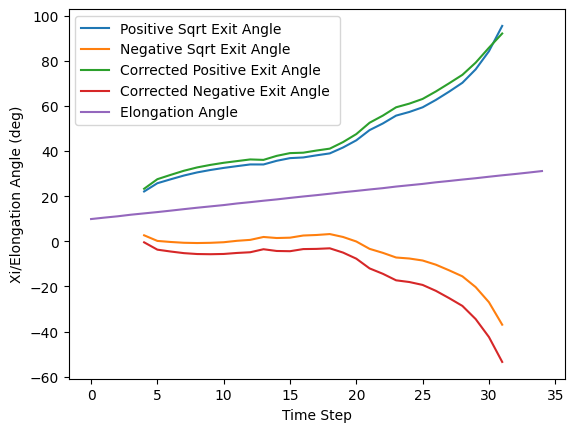

In [11]:
def trueXi(l, r, xiPrime, epsilon):
    

    d = np.sqrt(l**2 + 1 - 2*l*np.cos(np.deg2rad(epsilon)))

    chiPrime = np.rad2deg(np.arccos((l**2 + d**2 - 1)/(2*l*d)))

    
    func = lambda xi :  -xiPrime + xi + r/(r+d)*(180 - chiPrime- np.rad2deg(np.arccos(r/l)))
    sol = fsolve(func, xiPrime)

    print("d: ", d)
    print("l: ", l)
    print("r: ", r)
    print("epsilon: ", epsilon)
    print("xiPrime: "   , xiPrime)
    print("func(sol) = " , func(sol))
    print("xi: ", sol)
    if(xiPrime == sol):
        return np.nan
    return sol



xiNegarray = np.zeros(35)
xiPosarray = np.zeros(35)

print("xiPrimeNegArray: ", xiPrimeNegArray)
print("xiPrimePosArray: ", xiPrimePosArray)

for i in range(35):
    if np.isnan(xiPrimeNegArray[i]) or np.isnan(xiPrimePosArray[i]):
        xiNegarray[i] = np.nan
        xiPosarray[i] = np.nan
        continue
    xiNegarray[i] = trueXi(lArrayNeg[i], rArrayNeg[i], xiPrimeNegArray[i], epsilonArray[i])
    xiPosarray[i] = trueXi(lArrayPos[i], rArrayPos[i], xiPrimePosArray[i], epsilonArray[i])

print("xiNegarray: ", xiNegarray)
print("xiPosarray: ", xiPosarray)
fig, axs = plt.subplots()   
axs.plot(xiPrimePosArray, label='Positive Sqrt Exit Angle')
axs.plot(xiPrimeNegArray, label='Negative Sqrt Exit Angle') 
axs.plot(xiPosarray, label='Corrected Positive Exit Angle')
axs.plot(xiNegarray, label='Corrected Negative Exit Angle ')
axs.plot(epsilonArray, label='Elongation Angle')
axs.set_ylabel('Xi/Elongation Angle (deg)')
axs.set_xlabel('Time Step')
axs.legend(loc='upper left') 
plt.show()

C:\Users\glenn\AppData\Local\Temp\ipykernel_3236\2403951438.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  cotXi = 1/np.tan(np.radians(xi))
C:\Users\glenn\AppData\Local\Temp\ipykernel_3236\2403951438.py:10: RuntimeWarning: invalid value encountered in scalar divide
  x = cotXi/(tanE + cotXi)


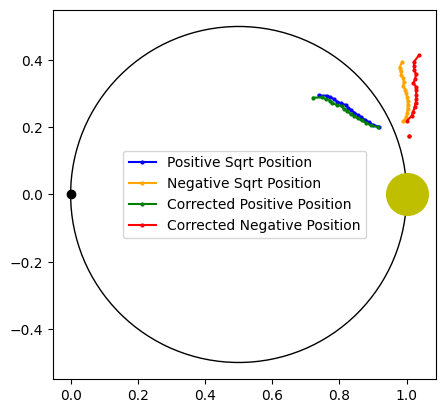

In [12]:
def calculatePositions(array, epsilonArray):
    positionArray = np.zeros((len(array),2))
    for i in range(len(array)):
        xi = array[i]
        epsilon = epsilonArray[i]
        cotXi = 1/np.tan(np.radians(xi))
        # print("cotXi = ", cotXi)
        tanE = np.tan(np.radians(epsilon))
        # print("tanE = ", tanE)
        x = cotXi/(tanE + cotXi)
        y = tanE*x
        positionArray[i] = np.array([x,y])
    
    return positionArray


axs = plt.subplot()
axs.plot(0,0, 'ko')
axs.plot(1,0, 'yo', markersize=30)

posPositionArray = calculatePositions(xiPrimePosArray, epsilonArray)
negPositionArray = calculatePositions(xiPrimeNegArray, epsilonArray)
posPositionArrayAdj = calculatePositions(xiPosarray, epsilonArray)
negPositionArrayAdj = calculatePositions(xiNegarray, epsilonArray)


axs.plot(posPositionArray[:20,0],posPositionArray[:20,1],color='blue', marker="o", label='Positive Sqrt Position', markersize=2)
axs.plot(negPositionArray[:20,0],negPositionArray[:20,1],color='orange', marker="o", label='Negative Sqrt Position', markersize=2)
axs.plot(posPositionArrayAdj[:20,0],posPositionArrayAdj[:20,1],color='green', marker="o", label='Corrected Positive Position', markersize=2)
axs.plot(negPositionArrayAdj[:20,0],negPositionArrayAdj[:20,1],color='red', marker="o", label='Corrected Negative Position', markersize=2)


thomson = plt.Circle((0.5, 0), 0.5, color='k', fill=False)
axs.add_patch(thomson)
axs.set_aspect('equal')
axs.legend()
plt.show()
